In [2]:
# Устанавливаем зависимости для математических вычислений
%pip install mpmath
%pip install sympy
%pip install numpy
%pip install scipy
%pip install matplotlib
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
## Импортируем необходимые пакеты
import math as m
import sympy as sp
import numpy as np
import scipy.integrate as spi
import scipy.optimize as spo
import matplotlib.pyplot as plt
from IPython.display import display

In [41]:
## Определяем переменные для формул

# Функция для вывода равенств
def print_equation(left, right):
    eq = sp.Eq(left, right)
    display(eq)

# Константы
g, mus, mud = sp.symbols('g mu_s mu_d')

# Параметры
a, h, d, phi, t = sp.symbols('a h d phi t')

# Вспомогательные переменные
n, A, B, C = sp.symbols('n A B C')

# Функции
r, dr, d2r = sp.symbols("r r' r''")
dphi, d2phi = sp.symbols("\dot{\phi}^2 {\dot{\phi}^2}'")

# Начальные условия
r0, dr0 = sp.symbols("r_0 r'_0")
phi0, dphi0 = sp.symbols('phi_0 \dot{\phi_0}^2')

# Значения функций и переменных в момент, когда бутерброд соскальзывает со стола
rd, drd = sp.symbols("r_d r'_d")
yd, dyd = sp.symbols('y_d \dot{y_d}')
phid, dphid, dphid2 = sp.symbols("phi_d \dot{\phi_d} \dot{\phi_d}^2")

# Угол, под которым упадет бутерброд 
phit = sp.Symbol('phi_t')

In [30]:
## Определяем систему для вычисления угловой скорости

# Значения вспомогательных переменных
eq_a = pow(a, 2) / (pow(a, 2) + pow(r, 2))
eq_b = (mud + (r * dr) / pow(a, 2))
eq_c = 2 * dr * eq_a
eq_n = g * sp.cos(phi) * eq_a - eq_c * dphi

# Первое уравнение системы ОДУ
eq_d2r = g * (sp.sin(phi) - B * A * sp.cos(phi)) - dphi * (d2r - r - C * B)
eq_d2r = sp.solve(eq_d2r, d2r)[0]

# Второе уравнение системы ОДУ
eq_d2phi = 2 * (g * (r * sp.cos(phi) + sp.sin(phi) * dr) - dphi * (r * dr + dr * d2r) - mud * n * r) / (pow(a, 2) + pow(r, 2) + pow(dr, 2))

# Начальные условия
eq_phi0 = sp.atan(mus / (1 + 3 * pow(d, 2)))
eq_dphi0 = g * 2 * d * sp.sin(phi0) / (pow(a, 2) + pow(d, 2))

print('\nВспомогательные переменные:')
print_equation(A, eq_a)
print_equation(B, eq_b)
print_equation(C, eq_c)
print_equation(n, eq_n)

print('\nCистема дифференциальных уравнений:')
print_equation(d2r, eq_d2r)
print_equation(d2phi, eq_d2phi)

print('\nНачальные условия:')
print_equation(r0, d)
print_equation(dr0, 0)
print_equation(phi0, eq_phi0)
print_equation(dphi0, eq_dphi0)



Вспомогательные переменные:


Eq(A, a**2/(a**2 + r**2))

Eq(B, mu_d + r*r'/a**2)

Eq(C, 2*a**2*r'/(a**2 + r**2))

Eq(n, -2*\dot{\phi}^2*a**2*r'/(a**2 + r**2) + a**2*g*cos(phi)/(a**2 + r**2))


Cистема дифференциальных уравнений:


Eq(r'', (-A*B*g*cos(phi) + \dot{\phi}^2*(B*C + r) + g*sin(phi))/\dot{\phi}^2)

Eq({\dot{\phi}^2}', (-2*\dot{\phi}^2*(r*r' + r'*r'') + 2*g*(r*cos(phi) + r'*sin(phi)) - 2*mu_d*n*r)/(a**2 + r**2 + r'**2))


Начальные условия:


Eq(r_0, d)

Eq(r'_0, 0)

Eq(phi_0, atan(mu_s/(3*d**2 + 1)))

Eq(\dot{\phi_0}^2, 2*d*g*sin(phi_0)/(a**2 + d**2))

In [31]:
## Определяем уравнение для вычисления угла, при котором
## бутерброд соскальзнет со стола (n = 0)

eq_left = g * sp.cos(phid)
eq_right = 2 * drd * dphid2

print("Уравнение угла соскальзывания:")
print_equation(eq_left, eq_right)

Уравнение угла соскальзывания:


Eq(g*cos(phi_d), 2*\dot{\phi_d}^2*r'_d)

In [114]:
## Определяем формулу для вычисления угла, под которым упадет бутерброд 

# Координата центра масс
eq_yd = - rd * sp.sin(phid)

# Скорость движения центра масс
eq_dyd = - dphid * (drd * sp.sin(phid) + rd * sp.cos(phid))

# Координата соприкасания бутерброда с полом
eq_h = yd + dyd * t - 4.9 * pow(t, 2) - a * sp.Abs(sp.sin(phid + dphid * t))

# Угол, под которым упадет бутерброд
eq_phit = phid + dphid * t

print('\nКоордината центра масс:')
print_equation(yd, eq_yd)
print('\nСкорость движения центра масс:')
print_equation(dyd, eq_dyd)
print('\nКоордината соприкасания бутерброда с полом:')
print_equation(h, eq_h)
print('\nУгол, под которым упадет бутерброд')
print_equation(phit, eq_phit)


Координата центра масс:


Eq(y_d, -r_d*sin(phi_d))


Скорость движения центра масс:


Eq(\dot{y_d}, -\dot{\phi_d}*(r'_d*sin(phi_d) + r_d*cos(phi_d)))


Координата соприкасания бутерброда с полом:


Eq(h, \dot{y_d}*t - a*Abs(sin(\dot{\phi_d}*t + phi_d)) - 4.9*t**2 + y_d)


Угол, под которым упадет бутерброд


Eq(phi_t, \dot{\phi_d}*t + phi_d)

In [148]:
# Математическая модель бутерброда с маслом
class Toast:
    def __init__(self):
        self.g, self.mus, self.mud = 9.82, 0.32, 0.24

    def init_conds(self):
        # Параметры
        g, mus = self.g, self.mus
        a, d = self.a, self.d

        # Начальные условия
        r0 = d
        dr0 = 0
        phi0 = m.atan(mus / (3 * pow(d, 2) + 1))
        dphi0 = 2 * d * g * m.sin(phi0) / (pow(a, 2) + pow(d, 2))

        return [r0, dr0, dphi0]
    
    def create_system(self, phi, y):
        # Параметры
        g, mud, a = self.g, self.mus, self.a

        # Неизвестные функции
        r, dr, dphi = y

        # Вспомогательные переменные
        A = pow(a, 2) / (pow(a, 2) + pow(r, 2))
        B = mud + (r * dr) / pow(a, 2)
        C = 2 * dr * A
        n = g * m.cos(phi) * A - dphi * C

        # Дифференциальные уравнения
        d2r	= (dphi * (B * C + r) + g * m.sin(phi) - A * B * g * m.cos(phi)) / dphi
        d2phi = (2 * g * (r * m.cos(phi) + dr * m.sin(phi)) - 2 * mud * n * r - 2 * dphi * (r * dr + dr * d2r)) / (pow(a, 2) + pow(r, 2) + pow(dr, 2))

        # Система f = (r', r'', phi')
        f = [dr, d2r, d2phi]
    
        return f
    
    def solve_system(self):
        # Начальные условия
        y0 = self.init_conds()

        # Интервал интегрирования
        phi = [0.0, 2.0 * m.pi]

        # Решение системы
        res = spi.solve_ivp(self.create_system, phi, y0, dense_output=True)

        # Получаем функции из решения
        r = lambda phi: res.sol(phi)[0]
        dr = lambda phi: res.sol(phi)[1]
        dphi = lambda phi: res.sol(phi)[2]

        return [r, dr, dphi]
    
    def find_detach_angle(self):
        # Параметры
        g, dr, dphi = self.g, self.dr, self.dphi

        # Уравнение
        phid0 = 0.8
        eq_phid = lambda phid: g * m.cos(phid) - 2 * dr(phid) * dphi(phid)

        # Решение уравнения 
        return spo.fsolve(eq_phid, phid0)

    def find_total_angle(self):
        # Параметры
        g, a, h = self.g, self.a, self.h
        r, dr = self.r, self.dr
        phid, dphi = self.phid, self.dphi

        # Вспомогательные переменные
        yd = - r(phid) * m.sin(phid)
        dyd = - m.sqrt(dphi(phid)) * (dr(phid) * m.sin(phid) + r(phid) * m.cos(phid))

        # Уравнение
        t0 = 0
        eq_t = lambda t: h - yd + dyd * t - g * pow(t, 2) / 2 - a * abs(m.sin(phid + m.sqrt(dphi(phid)) * t))
        # Решение уравнения
        t = spo.fsolve(eq_t, t0)

        # Угол под которым упадет бутерброд
        return phid + m.sqrt(dphi(phid)) * t - 0.5
    
    def tumble(self, length, height, overhang):
        self.a, self.h, self.d = length / (2 * m.sqrt(3)), height, overhang
        self.r, self.dr, self.dphi = self.solve_system()
        self.phid = self.find_detach_angle()
        self.phit = self.find_total_angle()
        return self.phit

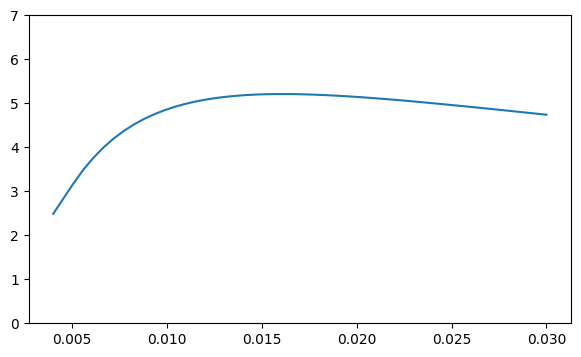

In [150]:
x = np.linspace(0.004, 0.03)
y = []

## Зависимость скорости центра масс от d
for i in x:
    toast = Toast()
    phit = toast.tumble(0.102, 0.72, i)
    y.append(phit)

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.set_ylim([0, 7])
ax.plot(x, y)